# EEG-3 Basic statistical analysis
*use r kernel*

In [1]:
library(ggplot2)
library(plyr)

feature = read.csv('data/feature.csv')
feature$label <- factor(feature$label, label=c('Normal', 'Epilepsy'))
feature

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


X,ApEn,peek,RMS,mean.frequency,label
0,0.067593863,9,472.68264,3.5,Epilepsy
1,0.037022339,10,155.18403,5.0,Epilepsy
2,0.009688105,9,304.30187,5.5,Epilepsy
3,0.029392393,12,558.42008,7.5,Epilepsy
4,0.052558211,7,151.88187,3.0,Epilepsy
5,0.014919228,11,138.69610,3.5,Epilepsy
6,0.028358880,11,434.53804,11.5,Epilepsy
7,0.017112658,13,231.93083,3.0,Epilepsy
8,0.029918991,9,177.99302,1.5,Epilepsy
9,0.029905927,16,531.76571,15.5,Epilepsy


Saving 6.67 x 6.67 in image


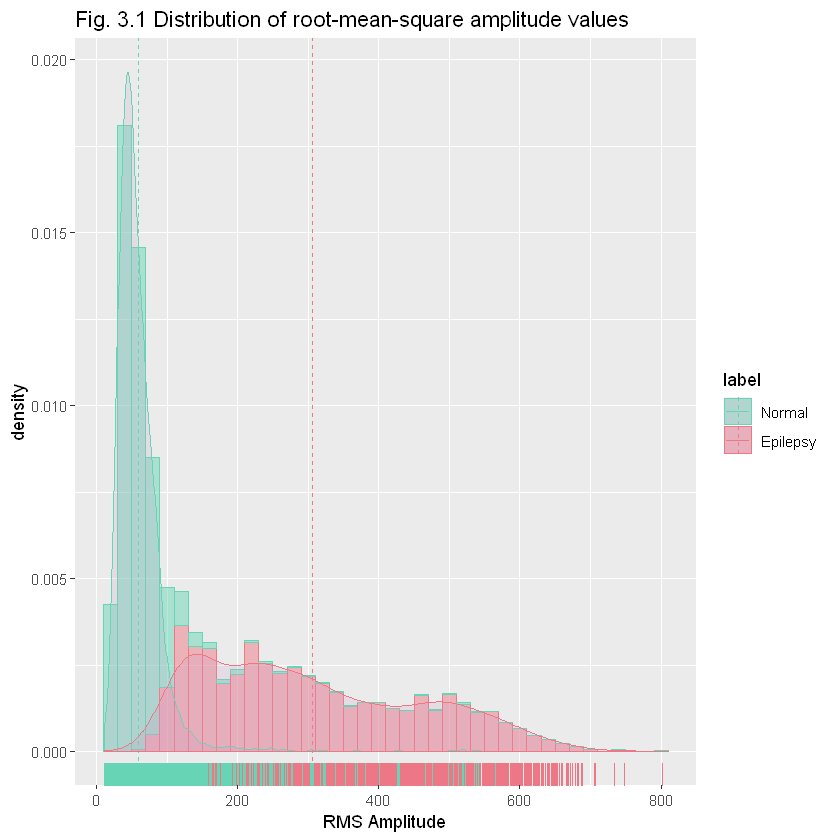

In [2]:
mu <- ddply(feature, "label", summarise, grp.mean=mean(RMS))

ggplot(data=feature, aes(x=RMS, color=label, fill=label))+
    geom_histogram(aes(y=..density..), binwidth=20, alpha=.5)+
    scale_fill_manual(values=c("#67D5B5","#EE7785"))+
    scale_color_manual(values=c("#67D5B5","#EE7785"))+
    geom_vline(data=mu, aes(xintercept = grp.mean, color=label), linetype="dashed")+
    geom_density(alpha=.2, fill="#C89EC4")+
    geom_rug(aes(color = label), sides="b")+
    labs(title = "Fig. 3.1 Distribution of root-mean-square amplitude values", x = 'RMS Amplitude')+
ggsave('Fig. 3.1 Distribution of root-mean-square amplitude values.png', dpi=600)

In [4]:
wilcox.test(RMS ~ label, data=feature)


	Wilcoxon rank sum test with continuity correction

data:  RMS by label
W = 230121, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Saving 6.67 x 6.67 in image


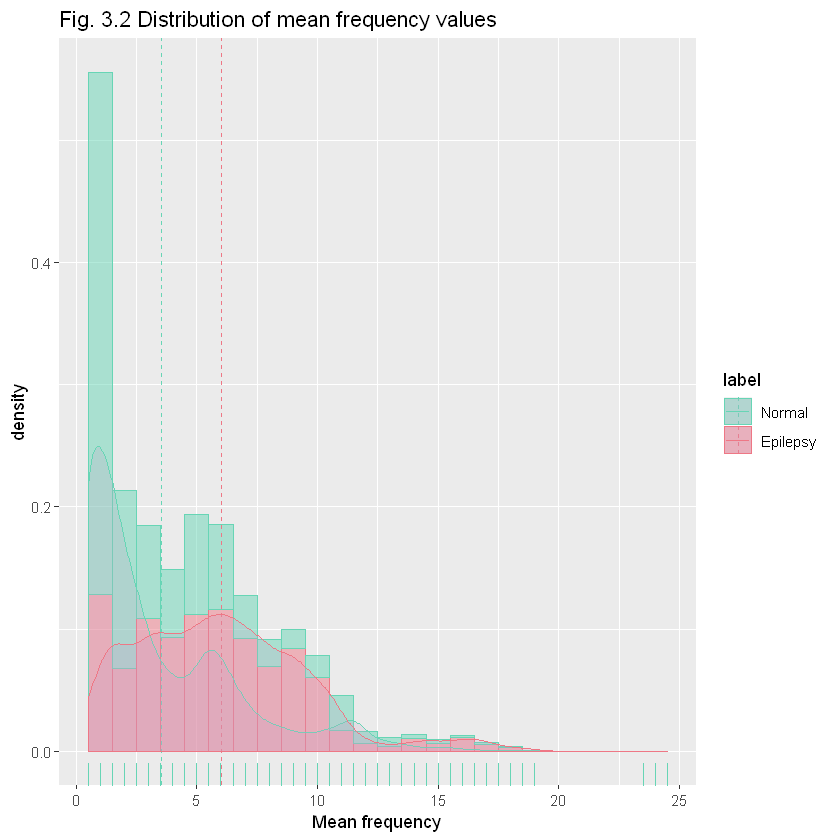

In [7]:
mu <- ddply(feature, "label", summarise, grp.mean=mean(mean.frequency))

ggplot(data=feature, aes(x=mean.frequency, color=label, fill=label))+
    geom_histogram(aes(y=..density..), binwidth=1, alpha=.5)+
    scale_fill_manual(values=c("#67D5B5","#EE7785"))+
    scale_color_manual(values=c("#67D5B5","#EE7785"))+
    geom_vline(data=mu, aes(xintercept = grp.mean, color=label), linetype="dashed")+
    geom_density(alpha=.2, fill="#C89EC4")+
    geom_rug(aes(color = label), sides="b")+
    labs(title = "Fig. 3.2 Distribution of mean frequency values", x = 'Mean frequency')+
ggsave('Fig. 3.2 Distribution of mean frequencies.png', dpi=600)

In [5]:
wilcox.test(mean.frequency ~ label, data=feature)


	Wilcoxon rank sum test with continuity correction

data:  mean.frequency by label
W = 5846943, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


Saving 6.67 x 6.67 in image


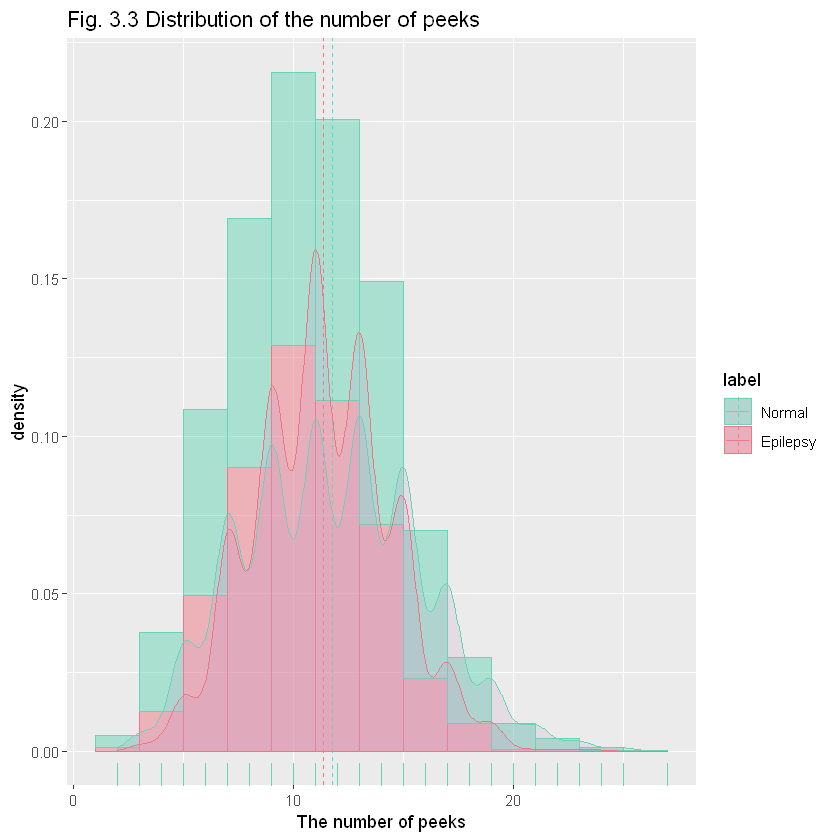

In [5]:
mu <- ddply(feature, "label", summarise, grp.mean=mean(peek))

ggplot(data=feature, aes(x=peek, color=label, fill=label))+
    geom_histogram(aes(y=..density..), binwidth=2, alpha=.5)+
    scale_fill_manual(values=c("#67D5B5","#EE7785"))+
    scale_color_manual(values=c("#67D5B5","#EE7785"))+
    geom_vline(data=mu, aes(xintercept = grp.mean, color=label), linetype="dashed")+
    geom_density(alpha=.2, fill="#C89EC4")+
    geom_rug(aes(color = label), sides="b")+
    labs(title = "Fig. 3.3 Distribution of the number of peeks", x = 'The number of peeks')+
ggsave('Fig. 3.3 Distribution of the number of peeks.png', dpi=600)

In [12]:
wilcox.test(peek ~ label, data=feature)


	Wilcoxon rank sum test with continuity correction

data:  peek by label
W = 11177887, p-value = 2.419e-05
alternative hypothesis: true location shift is not equal to 0


Saving 6.67 x 6.67 in image


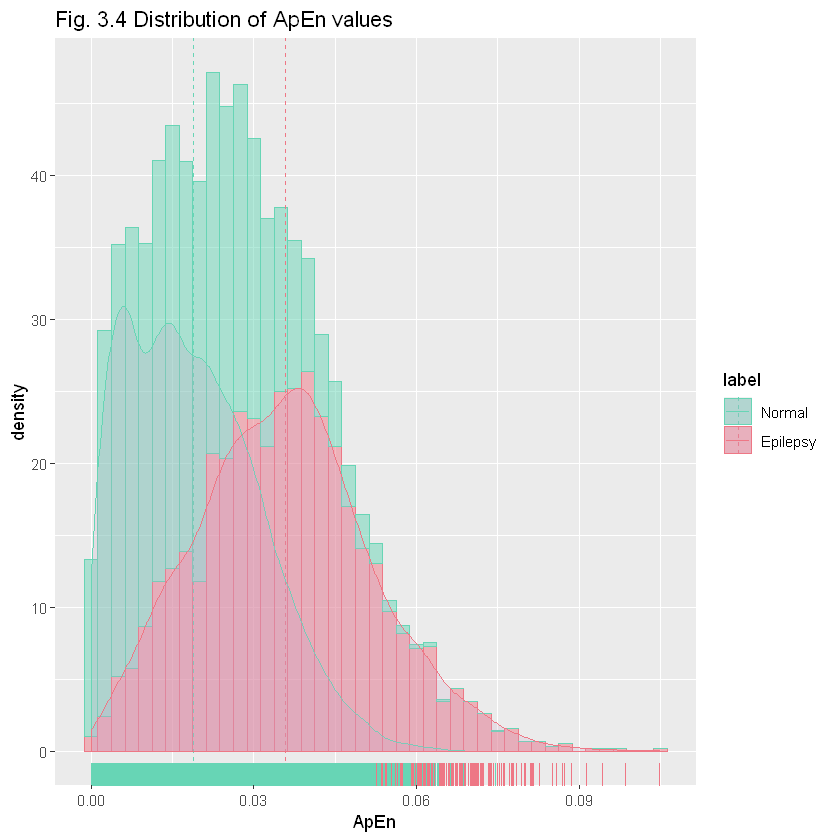

In [2]:
mu <- ddply(feature, "label", summarise, grp.mean=mean(ApEn))

ggplot(data=feature, aes(x=ApEn, color=label, fill=label))+
    geom_histogram(aes(y=..density..), binwidth=0.0025, alpha=.5)+
    scale_fill_manual(values=c("#67D5B5","#EE7785"))+
    scale_color_manual(values=c("#67D5B5","#EE7785"))+
    geom_vline(data=mu, aes(xintercept = grp.mean, color=label), linetype="dashed")+
    geom_density(alpha=.2, fill="#C89EC4")+
    geom_rug(aes(color = label), sides="b")+
    labs(title = "Fig. 3.4 Distribution of ApEn values")+
ggsave('Fig. 3.4 Distribution of ApEn values.png', dpi=600)

In [3]:
wilcox.test(ApEn ~ label, data=feature)


	Wilcoxon rank sum test with continuity correction

data:  ApEn by label
W = 4259539, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0
